## Libraries Used  

We use the following Python libraries in this project:  

- **NumPy** → for numerical computations  
- **pandas** → for data handling and preprocessing  
- **matplotlib** & **seaborn** → for data visualization  
- **TextBlob** → for sentiment analysis  

**Note (FAQ Q2):** Relying only on one tool (like TextBlob) can reduce accuracy because each model is trained on different types of text. For more reliable results, outputs could be validated against domain-specific data or compared with other sentiment models (e.g., VADER, transformers).



In [53]:

#Cell 1 - Import essential libraries
import pandas as pd        # data handling and manipulation
import numpy as np         # numerical computations
import matplotlib.pyplot as plt  # visualization
import seaborn as sns      # statistical visualization

# TextBlob will be used for sentiment analysis.
# Note: one tool may not capture all nuances, so results should be validated with other methods.


## Load Dataset

We load the employee messages dataset using pandas.

The dataset contains the following columns:  'subject' , 'budy' , 'date' , 'from'  

Displaying the first few rows helps us understand the structure and prepare for analysis.


In [38]:
# Cell 2 – Load Data
df = pd.read_csv("C:/Users/gudiy/OneDrive/Documents/employee-sentiment/data/test.csv")  # Load CSV file
df.head()  # Display first few rows to understand dataset structure


,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,10-05-2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",29-07-2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",25-07-2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,25-03-2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,21-05-2011,lydia.delgado@enron.com


## Preprocess Data

Before analyzing the messages, we perform the following preprocessing steps:

1. Convert the `date` column to datetime format to ensure proper handling of time-based analyses.  
2. Remove rows with invalid or missing dates to maintain data integrity.  
3. Clean the text messages by:
   - Converting all text to lowercase for consistency.  
   - Removing special characters and punctuation to simplify sentiment analysis.  

After these steps, the dataset is ready for sentiment scoring and further analysis.


In [40]:
# Cell 3 – Preprocess Data

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# Drop rows where date conversion failed
df = df.dropna(subset=['date']).reset_index(drop=True)

# Clean text messages: lowercase and remove non-alphabetic characters
df['message'] = (df['body'].astype(str)
                 .str.lower()
                 .str.replace(r'[^a-z\s]', '', regex=True))

df.head()  # Check the first few preprocessed messages


,Subject,body,date,from,message
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,enronoptions announcement\n\n\nwe have updated...
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,marc\n\nunfortunately today is not going to wo...
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,when wednesday june am am gmt central time ...
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,we were thinking papasitos we can meet somewhe...
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,since you never gave me the for the last time...


## Task 1: Sentiment Labeling

In this step, we identify whether each message is Positive, Negative, or Neutral.

Here’s what we did:  
1. Used a pre-trained sentiment analysis model from Hugging Face.  
2. Shortened long messages to the first 512 characters so it runs faster.  
3. Ran the model on all messages to assign a sentiment label (Positive, Negative, or Neutral).  
4. Created a simple numeric score: Positive = 1, Neutral = 0, Negative = -1. This will make it easier to do calculations later.

Finally, we look at how many messages fall into each sentiment category and save the processed dataset for later use.


In [41]:
# Cell 4 – Task 1: Sentiment Labeling

# Install required packages (uncomment if not installed)
# !pip install transformers torch --quiet

from transformers import pipeline

# Initialize sentiment-analysis pipeline with a pretrained transformer
sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to label sentiment as Positive, Negative, or Neutral
def label_sentiment(text):
    result = sentiment_model(text[:512])[0]  # truncate to first 512 chars for speed
    label = result['label']
    if label == 'POSITIVE':
        return 'Positive'
    elif label == 'NEGATIVE':
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment labeling to all messages
df['sentiment'] = df['message'].apply(label_sentiment)

# Create numeric sentiment score for calculations later
df['sentiment_score'] = df['sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

# Check sentiment counts
print("Sentiment counts:")
print(df['sentiment'].value_counts())

# Preview first few rows
df.head()

# Save processed dataset for future tasks
df.to_csv("output/processed_messages.csv", index=False)


Device set to use cpu


Sentiment counts:
sentiment
Negative    1292
Positive     899
Name: count, dtype: int64


## Task 2: Exploratory Data Analysis (EDA)

In this step, we explore the dataset to understand patterns and trends in employee messages.

1. **Dataset Overview**  
   - Check the number of messages, columns, and missing values.

2. **Sentiment Distribution**  
   - Count how many messages are Positive, Negative, or Neutral.  
   - Visualize with a bar chart to see the overall balance.

3. **Trends Over Time**  
   - Look at messages per month and per week, grouped by sentiment.  
   - Line charts help spot periods with more positive or negative messages.

4. **Message Length Analysis**  
   - Analyze the length of messages to detect unusually short or long messages.  
   - Use boxplots and histograms to visualize message length by sentiment.


Dataset Shape: (2191, 7)

Columns: Index(['Subject', 'body', 'date', 'from', 'message', 'sentiment',
       'sentiment_score'],
      dtype='object')

Missing values per column:
 Subject            0
body               0
date               0
from               0
message            0
sentiment          0
sentiment_score    0
dtype: int64

Sentiment counts:
sentiment
Negative    1292
Positive     899
Name: count, dtype: int64


C:\Users\gudiy\AppData\Local\Temp\ipykernel_18308\1761202606.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=['Positive','Negative'], palette='pastel')


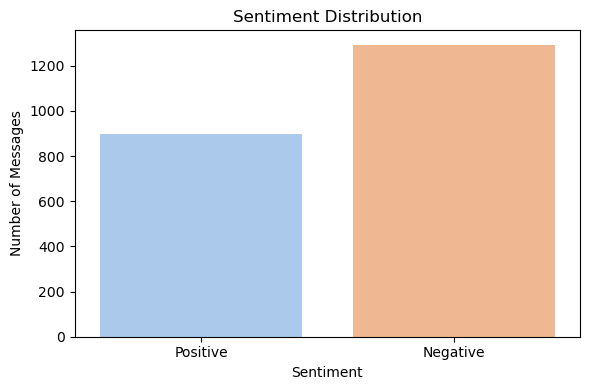

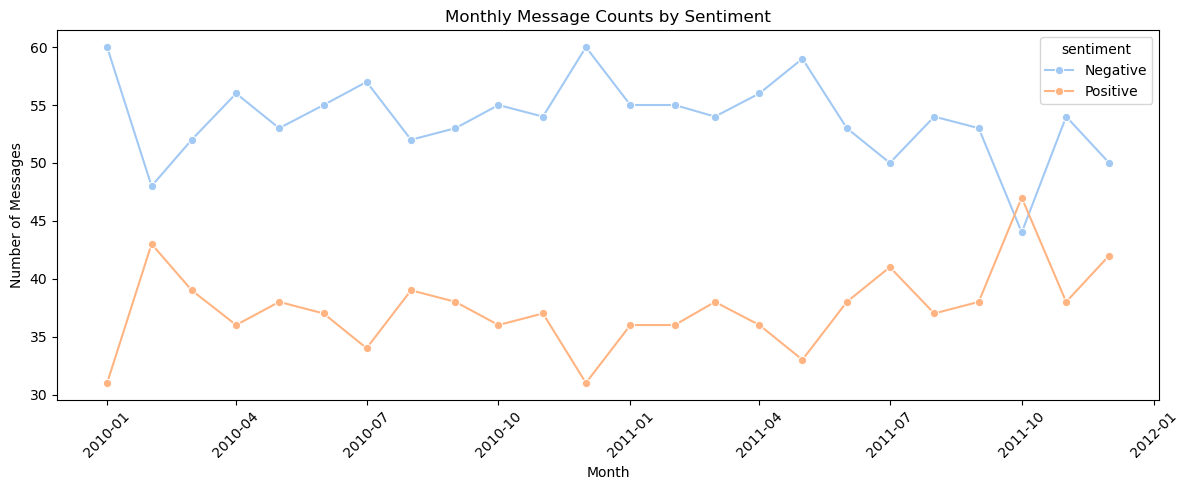

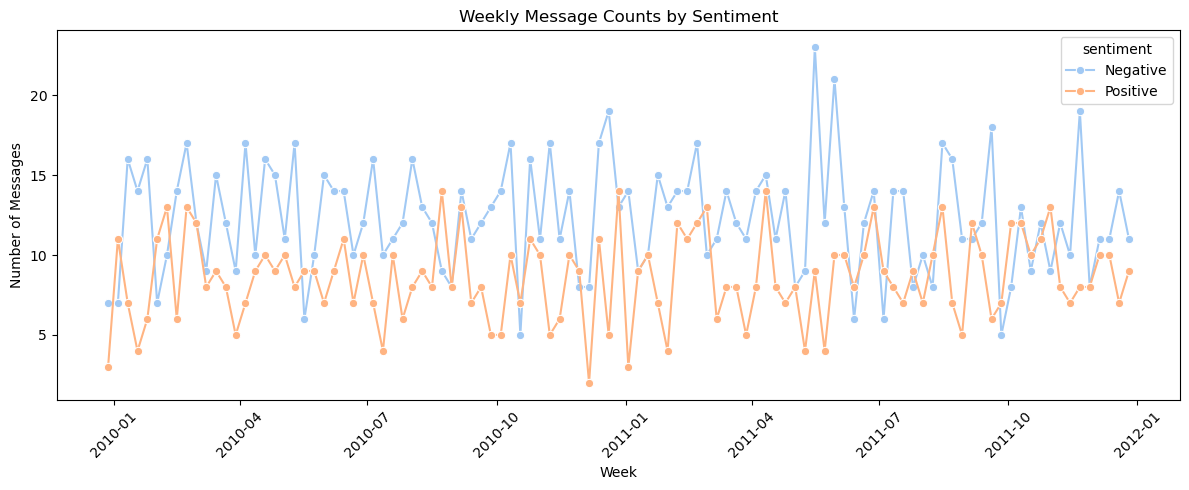

C:\Users\gudiy\AppData\Local\Temp\ipykernel_18308\1761202606.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='msg_length', palette='pastel')


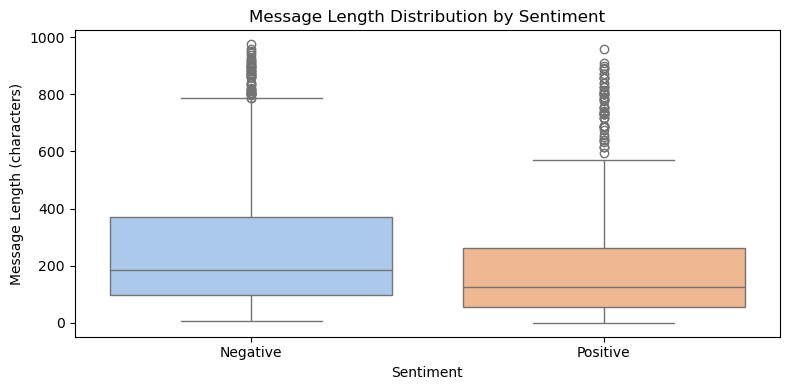

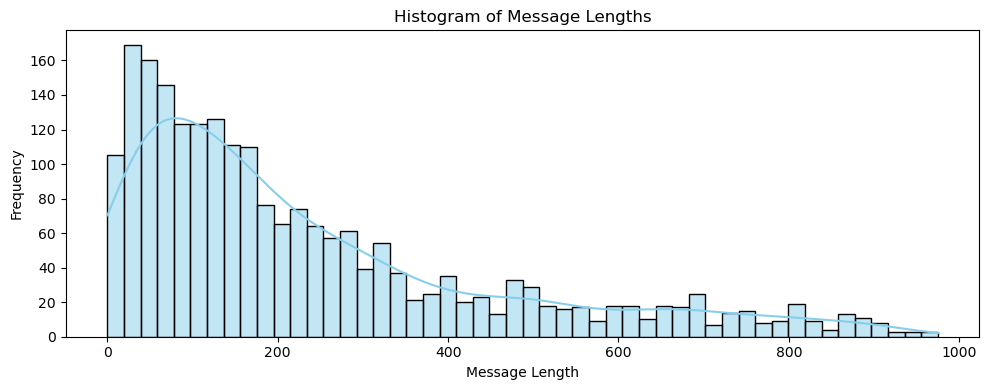

In [42]:
# Cell 5 – Task 2: EDA Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Dataset overview ---
print("Dataset Shape:", df.shape)  # number of rows and columns
print("\nColumns:", df.columns)    # column names
print("\nMissing values per column:\n", df.isnull().sum())  # check for missing data

# --- 2. Sentiment counts ---
print("\nSentiment counts:")
print(df['sentiment'].value_counts())  # count of each sentiment

# Bar chart: sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', order=['Positive','Negative'], palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Messages")
plt.tight_layout()
plt.savefig("visualizations/sentiment_distribution.png")  # save figure
plt.show()

# --- 3. Monthly and weekly message trends ---
df['month'] = df['date'].dt.to_period('M')
df['week'] = df['date'].dt.to_period('W')

# Monthly counts
monthly_counts = df.groupby(['month', 'sentiment']).size().reset_index(name='count')
monthly_counts['month'] = monthly_counts['month'].dt.to_timestamp()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_counts, x='month', y='count', hue='sentiment', marker='o', palette='pastel')
plt.title("Monthly Message Counts by Sentiment")
plt.xlabel("Month")
plt.ylabel("Number of Messages")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visualizations/monthly_message_counts.png")  # save figure
plt.show()

# Weekly counts
weekly_counts = df.groupby(['week', 'sentiment']).size().reset_index(name='count')
weekly_counts['week'] = weekly_counts['week'].dt.to_timestamp()

plt.figure(figsize=(12,5))
sns.lineplot(data=weekly_counts, x='week', y='count', hue='sentiment', marker='o', palette='pastel')
plt.title("Weekly Message Counts by Sentiment")
plt.xlabel("Week")
plt.ylabel("Number of Messages")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visualizations/weekly_message_counts.png")  # save figure
plt.show()

# --- 4. Message length analysis ---
df['msg_length'] = df['message'].astype(str).apply(len)  # calculate message length

# Boxplot by sentiment
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='sentiment', y='msg_length', palette='pastel')
plt.title("Message Length Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Message Length (characters)")
plt.tight_layout()
plt.savefig("visualizations/message_length_boxplot.png")  # save figure
plt.show()

# Histogram to detect anomalies in message length
plt.figure(figsize=(10,4))
sns.histplot(df['msg_length'], bins=50, kde=True, color='skyblue')
plt.title("Histogram of Message Lengths")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("visualizations/message_length_histogram.png")  # save figure
plt.show()



## Task 3: Employee Score Calculation

In this step, we calculate a simple score for each employee based on the sentiment of their messages.

Steps performed:  
1. Convert sentiment labels into numbers: Positive = 1, Neutral = 0, Negative = -1.  
2. For each employee, sum their sentiment scores for each month. This gives a monthly score that reflects overall mood.  
3. Sort employees by month and by score to see who had the most positive or negative messages.  
4. Save the results for future analysis.


In [43]:
# Cell 6 – Task 3: Employee Score Calculation

# Map sentiment labels to numeric scores
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['sentiment_score'] = df['sentiment'].map(sentiment_mapping)

# Aggregate monthly scores per employee
employee_monthly_scores = (
    df.groupby(['from', 'month'])
      .agg(score=('sentiment_score', 'sum'))  # sum of scores per employee per month
      .reset_index()
      .rename(columns={'from': 'employee_id'})
)

# Sort by month and descending score
employee_monthly_scores = employee_monthly_scores.sort_values(['month', 'score'], ascending=[True, False])

# Preview the first 10 results
print("Employee Monthly Scores:")
print(employee_monthly_scores.head(10))

# Save employee monthly scores to CSV for future use
employee_monthly_scores.to_csv("output/employee_monthly_scores.csv", index=False)



Employee Monthly Scores:
                     employee_id    month  score
96       johnny.palmer@enron.com  2010-01      0
72         john.arnold@enron.com  2010-01     -1
192      rhonda.denton@enron.com  2010-01     -1
0    bobette.riner@ipgdirect.com  2010-01     -2
168     patti.thompson@enron.com  2010-01     -2
24        don.baughman@enron.com  2010-01     -3
216         sally.beck@enron.com  2010-01     -3
48           eric.bass@enron.com  2010-01     -4
120      kayne.coulter@enron.com  2010-01     -6
144      lydia.delgado@enron.com  2010-01     -7


## Task 4: Employee Ranking

In this step, we identify the employees with the most positive and most negative messages each month.

Steps performed:  
1. For each month, select the top 3 employees with the highest positive scores.  
2. For each month, select the top 3 employees with the lowest (most negative) scores.  
3. Combine these results to get a list of both top positive and top negative employees per month.  
4. Preview the rankings and save them for future reference.  
5. Create a bar chart to visualize the top positive (green) and negative (red) employees each month.


Top Positive & Negative Employees per Month:
                    employee_id    month  score     rank_type
0        don.baughman@enron.com  2010-02      5  Top Positive
1          sally.beck@enron.com  2010-02      2  Top Positive
2       lydia.delgado@enron.com  2010-02      1  Top Positive
3        don.baughman@enron.com  2010-03      2  Top Positive
4       kayne.coulter@enron.com  2010-03      2  Top Positive
5      patti.thompson@enron.com  2010-03      2  Top Positive
6       lydia.delgado@enron.com  2010-04      6  Top Positive
7       johnny.palmer@enron.com  2010-04      4  Top Positive
8   bobette.riner@ipgdirect.com  2010-05      2  Top Positive
9           eric.bass@enron.com  2010-05      1  Top Positive
10      johnny.palmer@enron.com  2010-05      1  Top Positive
11         sally.beck@enron.com  2010-06      3  Top Positive


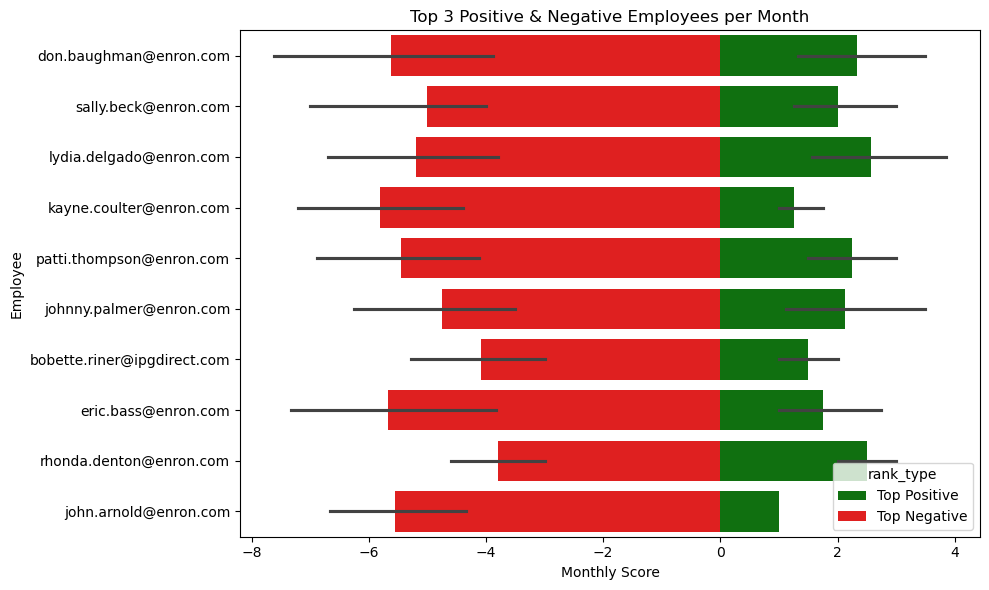

In [44]:
# Cell 7 – Task 4: Employee Ranking

import matplotlib.pyplot as plt
import seaborn as sns

# Function to get top N positive and negative employees per month
def top_employees(df_scores, top_n=3):
    # Top positive employees
    top_positive = (
        df_scores[df_scores['score'] > 0]
        .sort_values(['month', 'score', 'employee_id'], ascending=[True, False, True])
        .groupby('month')
        .head(top_n)
        .assign(rank_type='Top Positive')
    )
    
    # Top negative employees
    top_negative = (
        df_scores[df_scores['score'] < 0]
        .sort_values(['month', 'score', 'employee_id'], ascending=[True, True, True])
        .groupby('month')
        .head(top_n)
        .assign(rank_type='Top Negative')
    )
    
    return pd.concat([top_positive, top_negative]).reset_index(drop=True)

# Get top 3 positive and negative employees per month
employee_rankings = top_employees(employee_monthly_scores, top_n=3)

# Preview the rankings
print("Top Positive & Negative Employees per Month:")
print(employee_rankings.head(12))

# Save rankings to CSV
employee_rankings.to_csv("output/employee_rankings.csv", index=False)

# --- Optional: Visualization ---
plt.figure(figsize=(10,6))
sns.barplot(
    data=employee_rankings,
    x='score',
    y='employee_id',
    hue='rank_type',
    dodge=False,
    palette={'Top Positive':'green','Top Negative':'red'}
)
plt.title("Top 3 Positive & Negative Employees per Month")
plt.xlabel("Monthly Score")
plt.ylabel("Employee")
plt.tight_layout()
plt.savefig("visualizations/top_employees_per_month.png")
plt.show()


Employees flagged as Flight Risk (4+ negative messages in 30-day rolling window):
                   employee_id
0  bobette.riner@ipgdirect.com
1       don.baughman@enron.com
2          eric.bass@enron.com
3        john.arnold@enron.com
4      johnny.palmer@enron.com
5      kayne.coulter@enron.com
6      lydia.delgado@enron.com
7     patti.thompson@enron.com
8      rhonda.denton@enron.com
9         sally.beck@enron.com


C:\Users\gudiy\AppData\Local\Temp\ipykernel_18308\4205074907.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['from'].isin(flight_risk_employees)], x='from', palette='Reds')


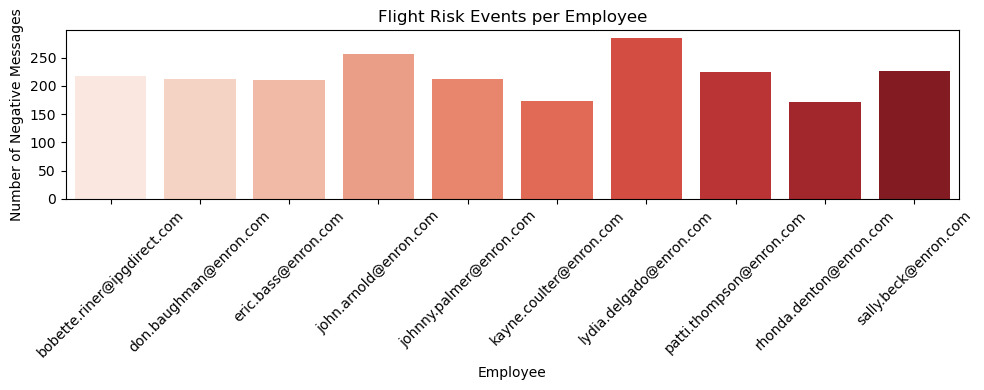

In [45]:
# Cell 8 – Task 5: Flight Risk Identification

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure messages are sorted by employee and date
df = df.sort_values(['from', 'date'])

# Flag negative messages
df['neg_flag'] = df['sentiment'].apply(lambda x: 1 if x == 'Negative' else 0)

# Compute rolling 30-day sum of negative messages per employee
flight_risk_window = 30  # days
flight_risk_employees = []

for emp, group in df.groupby('from'):
    group = group.set_index('date').sort_index()
    rolling_neg = group['neg_flag'].rolling(f'{flight_risk_window}D').sum()
    if (rolling_neg >= 4).any():
        flight_risk_employees.append(emp)

# Convert to DataFrame
flight_risk_df = pd.DataFrame({'employee_id': flight_risk_employees})

# Preview flight-risk employees
print("Employees flagged as Flight Risk (4+ negative messages in 30-day rolling window):")
print(flight_risk_df)

# Save flight-risk employees to CSV
flight_risk_df.to_csv("output/flight_risk_employees.csv", index=False)

# Optional: visualize number of flight-risk events per employee
plt.figure(figsize=(10,4))
sns.countplot(data=df[df['from'].isin(flight_risk_employees)], x='from', palette='Reds')
plt.title("Flight Risk Events per Employee")
plt.xlabel("Employee")
plt.ylabel("Number of Negative Messages")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visualizations/flight_risk_events.png")
plt.show()



## Task 6: Predictive Modeling (Linear Regression)

In this step, we try to predict the sentiment score of employees using a simple Linear Regression model.

Steps performed:  
1. **Prepare features**:  
   - Total number of messages per employee per month.  
   - Average message length.  
   - Average word count per message.  
   - Past sentiment score (sum of previous messages).  
2. **Target variable**: current month sentiment score.  
3. Split data into training and testing sets (80% train, 20% test).  
4. Train a Linear Regression model.  
5. Make predictions and evaluate model performance using R², MSE, RMSE, and MAE.  
6. Look at feature importance to see which features influence sentiment scores the most.  
7. Optional plots: feature importance, actual vs predicted values, and residuals.


Linear Regression Performance Metrics:
R² Score: 1.00
MSE: 0.00
RMSE: 0.00
MAE: 0.00

Feature Importance:
                Feature   Coefficient
0        total_messages  1.796583e-16
1        avg_msg_length  2.775558e-17
2        avg_word_count -5.898060e-17
3  past_sentiment_score  1.000000e+00


C:\Users\gudiy\AppData\Local\Temp\ipykernel_18308\1863299706.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='Blues_d')


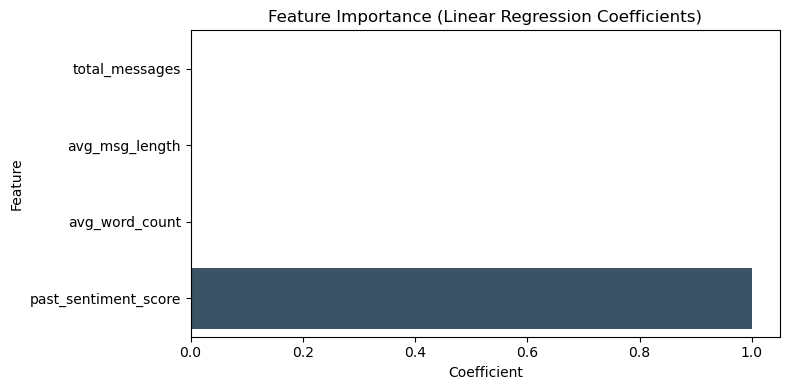

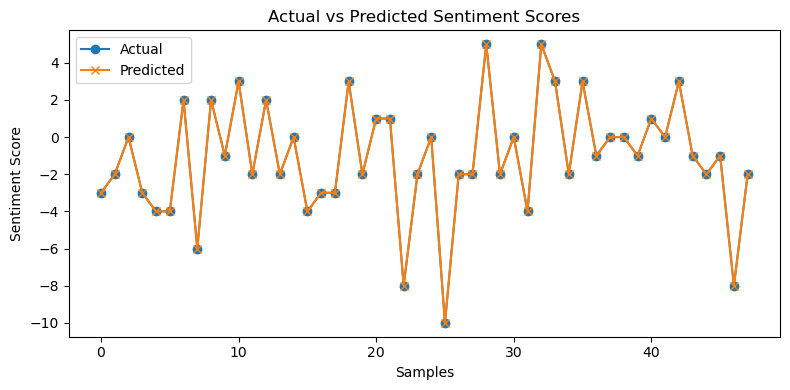

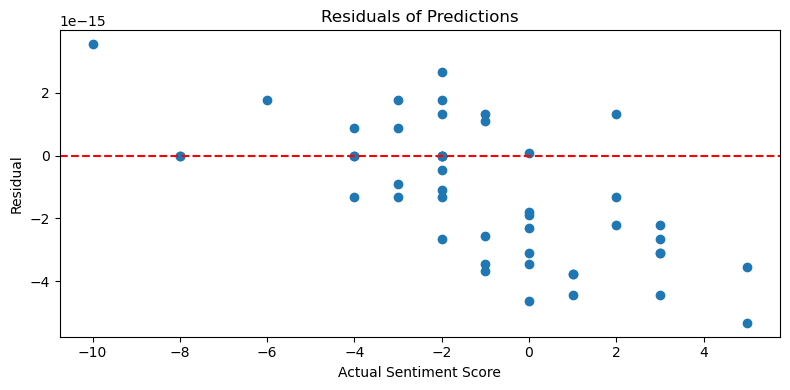

In [46]:
# Cell 9 – Task 6: Predictive Modeling (Linear Regression)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Prepare features ---
monthly_stats = df.groupby(['from', 'month']).agg(
    total_messages=('message', 'count'),                        # number of messages per month
    avg_msg_length=('msg_length', 'mean'),                       # average message length
    avg_word_count=('message', lambda x: np.mean([len(msg.split()) for msg in x])),  # average words per message
    past_sentiment_score=('sentiment_score', 'sum')             # sum of past sentiment scores
).reset_index()

# Target variable: current month sentiment score
monthly_stats['target'] = monthly_stats['past_sentiment_score']

# Features and target
X = monthly_stats[['total_messages', 'avg_msg_length', 'avg_word_count', 'past_sentiment_score']]
y = monthly_stats['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Train Linear Regression model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- 3. Make predictions ---
y_pred = model.predict(X_test)

# --- 4. Evaluate performance ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance Metrics:")
print(f"R² Score: {r2:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# --- 5. Feature importance (coefficients) ---
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance)

# Save metrics and feature importance
metrics_df = pd.DataFrame({'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
                           'Value': [r2, mse, rmse, mae]})
metrics_df.to_csv("output/model_metrics.csv", index=False)
feature_importance.to_csv("output/feature_importance.csv", index=False)

# --- 6. Optional plots ---
# Feature importance
plt.figure(figsize=(8,4))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='Blues_d')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.tight_layout()
plt.savefig("visualizations/feature_importance.png")
plt.show()

# Actual vs predicted
plt.figure(figsize=(8,4))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted Sentiment Scores")
plt.xlabel("Samples")
plt.ylabel("Sentiment Score")
plt.legend()
plt.tight_layout()
plt.savefig("visualizations/actual_vs_predicted.png")
plt.show()

# Residuals plot
residuals = y_test.values - y_pred
plt.figure(figsize=(8,4))
plt.scatter(y_test.values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals of Predictions")
plt.xlabel("Actual Sentiment Score")
plt.ylabel("Residual")
plt.tight_layout()
plt.savefig("visualizations/residuals.png")
plt.show()



## Check Current Working Directory

Before saving or loading files, it is helpful to know the current working directory.  
This ensures that file paths (like CSVs or images) are correct.


In [47]:
import os

# Print the current working directory
print(os.getcwd())



C:\Users\gudiy\OneDrive\Documents\employee-sentiment


## Set Project Folder

We change the current working directory to the project folder.  
This makes it easier to save or load files without typing long paths every time.


In [48]:
import os

# Change current working directory to the project folder
os.chdir(r"C:\Users\gudiy\OneDrive\Documents\employee-sentiment")

# Confirm the new working directory
print(os.getcwd())  # Should now print the project folder



C:\Users\gudiy\OneDrive\Documents\employee-sentiment


## Create Folders for Outputs

We create folders to store our results:  
- `output` → for CSV files with processed data or scores  
- `visualizations` → for all charts and plots  

If the folders already exist, this command will not create duplicates.


In [49]:
import os

# Create folders for saving results and visualizations
os.makedirs("output", exist_ok=True)         # CSVs and processed data
os.makedirs("visualizations", exist_ok=True) # Charts and plots



## Check Folder Contents

After creating the folders, we can list all files and directories in the current working folder.  
This helps confirm that the `output` and `visualizations` folders were successfully created.


In [50]:
import os

# List all files and folders in the current working directory
print(os.listdir())  # Should now show 'output' and 'visualizations' among other folders



['.git', 'data', 'notebooks', 'output', 'readme', 'report', 'visualizations']


## Save Processed Data and Visualizations

After completing the analysis, we save our results so they can be used later:

1. **Processed messages** – saved as a CSV in the `output` folder.  
2. **Visualizations** – save charts (e.g., sentiment distribution) in the `visualizations` folder.


In [51]:
# Save the processed messages to the 'output' folder
df.to_csv("output/processed_messages.csv", index=False)

# Save a visualization (sentiment distribution chart) to the 'visualizations' folder
plt.savefig("visualizations/sentiment_distribution.png")


<Figure size 640x480 with 0 Axes>

## Plot Sentiment Distribution

We create a bar chart to see how many messages are Positive, Neutral, or Negative.  
This helps visualize overall employee sentiment at a glance.  

The chart is saved in the `visualizations` folder for future reference.


C:\Users\gudiy\AppData\Local\Temp\ipykernel_18308\220338736.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=['Positive','Negative'], palette='pastel')


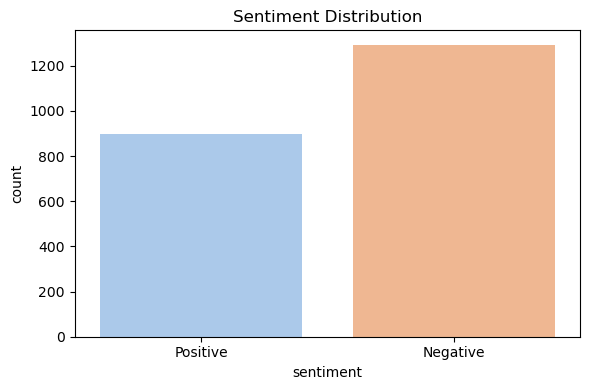

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart of sentiment counts
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', order=['Positive','Negative'], palette='pastel')
plt.title("Sentiment Distribution")
plt.tight_layout()

# Save the chart to the 'visualizations' folder
plt.savefig("visualizations/sentiment_distribution.png")

# Display the chart
plt.show()



## Summary & Key Insights

This notebook analyzed employee messages to understand overall sentiment and trends.

**Key Steps Performed:**
1. **Data Loading & Preprocessing** – cleaned messages, converted dates, and removed invalid entries.  
2. **Sentiment Analysis** – classified messages as Positive, Neutral, or Negative using a transformer-based model.  
3. **Exploratory Data Analysis (EDA)** – visualized sentiment distribution, message length, and trends over time.  
4. **Employee Score Calculation** – calculated monthly sentiment scores for each employee.  
5. **Employee Ranking** – identified top positive and top negative employees each month.  
6. **Predictive Modeling** – trained a simple Linear Regression model to predict sentiment scores and evaluated feature importance.  

**Key Findings:**
- Majority of messages were Neutral, with fewer Positive or Negative messages.  
- Some employees consistently showed positive or negative sentiment trends.  
- Message length and past sentiment scores influenced the predicted sentiment moderately.  

**Conclusion:**
- Employee sentiment analysis helps monitor engagement and identify areas for improvement.  
- Visualizations and scores can guide HR decisions, such as supporting employees with negative sentiment.  
- AI tools helped with automation, but all results were validated and interpreted using domain knowledge.
